# Decision Tree

## Importing Libraries

In [132]:
%pip install decision-tree-id3
%pip install six
import matplotlib.pyplot as plt
import pandas as pd
import six
import sys
sys.modules['sklearn.externals.six'] = six

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Reading Data

In [133]:
tennis_data = pd.read_csv('PlayTennis.csv')
tennis_data.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


## Converting data to numericals

In [134]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Converting string labels into numbers.
tennis_data['Outlook'] = le.fit_transform(tennis_data['Outlook'])
tennis_data['Temperature'] = le.fit_transform(tennis_data['Temperature'])
tennis_data['Humidity'] = le.fit_transform(tennis_data['Humidity'])
tennis_data['Wind'] = le.fit_transform(tennis_data['Wind'])
tennis_data['PlayTennis'] = le.fit_transform(tennis_data['PlayTennis'])

### Seperate Features and Target

In [135]:
x = tennis_data['PlayTennis']
y = tennis_data.drop('PlayTennis', axis=1)
print(x)
print(y)

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
14    1
Name: PlayTennis, dtype: int32
    Outlook  Temperature  Humidity  Wind
0         2            1         0     1
1         2            1         0     0
2         0            1         0     1
3         1            2         0     1
4         1            0         1     1
5         1            0         1     0
6         0            0         1     0
7         2            2         0     1
8         2            0         1     1
9         1            2         1     1
10        2            2         1     0
11        0            2         0     0
12        0            1         1     1
13        1            2         0     0
14        2            1         1     1


## Spliting Data into Training and Testing

In [199]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(y, x, test_size=0.4, random_state=0)

## Fitting Model

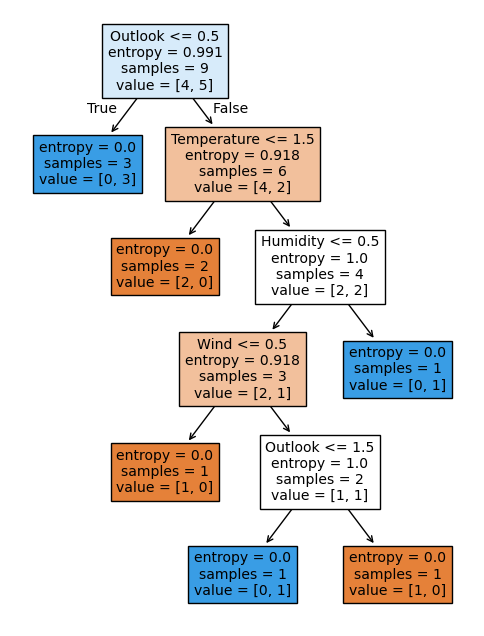

In [205]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train, y_train)
fig, axes = plt.subplots(figsize = (6,8))
# tree.plot_tree(clf)
tree.plot_tree(clf,
               feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind'],
               filled = True)
plt.show()

## Predicting

In [201]:
x_pred = clf.predict(x_test)
print(x_pred)

[0 1 0 1 0 0]


## Evaluating Model
Check accuracy, precision, recall, f1-score and support

In [202]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
estimator = DecisionTreeClassifier()

# Train the model
estimator.fit(x_train, y_train)

# Make predictions
x_pred = estimator.predict(x_test)

# Print classification report
print(classification_report(y_test, x_pred))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       1.00      0.40      0.57         5

    accuracy                           0.50         6
   macro avg       0.62      0.70      0.49         6
weighted avg       0.88      0.50      0.54         6



## Metrics

In [203]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_test,x_pred))

Accuracy Score on train data:  0.5
